In [63]:
from sklearn import datasets
import numpy as np
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.model_selection import GridSearchCV,train_test_split
import matplotlib.pyplot as plt

# 1.数据导入

In [34]:
Feature,label = datasets.load_diabetes(return_X_y=True)
print(Feature.shape)
print(label.shape)
print(Feature,label)

(442, 10)
(442,)
[[ 0.03807591  0.05068012  0.06169621 ... -0.00259226  0.01990842
  -0.01764613]
 [-0.00188202 -0.04464164 -0.05147406 ... -0.03949338 -0.06832974
  -0.09220405]
 [ 0.08529891  0.05068012  0.04445121 ... -0.00259226  0.00286377
  -0.02593034]
 ...
 [ 0.04170844  0.05068012 -0.01590626 ... -0.01107952 -0.04687948
   0.01549073]
 [-0.04547248 -0.04464164  0.03906215 ...  0.02655962  0.04452837
  -0.02593034]
 [-0.04547248 -0.04464164 -0.0730303  ... -0.03949338 -0.00421986
   0.00306441]] [151.  75. 141. 206. 135.  97. 138.  63. 110. 310. 101.  69. 179. 185.
 118. 171. 166. 144.  97. 168.  68.  49.  68. 245. 184. 202. 137.  85.
 131. 283. 129.  59. 341.  87.  65. 102. 265. 276. 252.  90. 100.  55.
  61.  92. 259.  53. 190. 142.  75. 142. 155. 225.  59. 104. 182. 128.
  52.  37. 170. 170.  61. 144.  52. 128.  71. 163. 150.  97. 160. 178.
  48. 270. 202. 111.  85.  42. 170. 200. 252. 113. 143.  51.  52. 210.
  65. 141.  55. 134.  42. 111.  98. 164.  48.  96.  90. 162. 150.

# 2.数据标准化

In [35]:
Feature=preprocessing.scale(Feature)
label=preprocessing.scale(label)

# 3.模型构建

经过多次调试发现两个需要网格搜索的模型最终得到的最优alpha值差别很大，其中lasso回归经网格搜索后最优alpha值约为0.2左右，而岭回归最优alpha值却较大。

In [38]:
feature_train,feature_test,label_train,label_test=train_test_split(Feature,label,test_size=0.3, train_size=0.7)

In [51]:
reg = LinearRegression().fit(feature_train,label_train)
ridge =Ridge()
lasso =Lasso()
alpha_can1 = np.linspace(20,30,100)
alpha_can2 = np.linspace(0,0.3,50)#设置进行试验的alpha值的数目
ridge_model = GridSearchCV(ridge, param_grid={'alpha': alpha_can1}, cv=5).fit(feature_train,label_train)
lasso_model = GridSearchCV(lasso, param_grid={'alpha': alpha_can2}, cv=5).fit(feature_train,label_train)
alpha1,alpha2=ridge_model.best_params_ ,lasso_model.best_params_
print("训练后获得的Ridge Regression和LASSO最优的alpha值分别为%f，%f"%(alpha1['alpha'],alpha2['alpha']))

C:\Users\hp\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 51.27634328627409, tolerance: 0.022724529407797855
  model = cd_fast.enet_coordinate_descent(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimat

训练后获得的Ridge Regression和LASSO最优的alpha值分别为28.383838，0.024490


# 4、模型比较

In [56]:
def R_cal(predict,ture):#求R—Square的函数
    ave=sum(ture)/len(ture)
    SST,SSE=0,0
    for i in range(len(ture)):
        SST+=(ture[i]-ave)**2
    for i in range(len(predict)):
        SSE+=(ture[i]-predict[i])**2
    R2=1-(SSE/SST)
    return R2
reg_value=reg.predict(feature_test)#各个模型的预测值
ridge_value=ridge_model.predict(feature_test)
lasso_value=lasso_model.predict(feature_test)

In [57]:
reg_R=R_cal(reg_value,label_test)
ridge_R=R_cal(ridge_value,label_test)
lasso_R=R_cal(lasso_value,label_test)
print("逻辑回归、岭回归、LASSO回归的R-Square值分别为%f,%f,%f"%(reg_R,ridge_R,lasso_R))

逻辑回归、岭回归、LASSO回归的R-Square值分别为0.516121,0.515324,0.517101


In [61]:
reg_w=reg.coef_#各个模型的回归系数
ridge_w=Ridge(alpha=alpha1['alpha']).fit(feature_train,label_train).coef_
lasso_w=Lasso(alpha=alpha2['alpha']).fit(feature_train,label_train).coef_
reg_b=reg.intercept_
ridge_b=Ridge(alpha=alpha1['alpha']).fit(feature_train,label_train).intercept_
lasso_b=Lasso(alpha=alpha2['alpha']).fit(feature_train,label_train).intercept_
print(reg_w,ridge_w,lasso_w)
print(reg_b,ridge_b,lasso_b)

[-0.01620209 -0.16554494  0.33309273  0.20281567 -0.45154469  0.22663419
  0.08154838  0.1741068   0.44115894  0.02897993] [-0.01114125 -0.14720829  0.30962494  0.18916878 -0.05175599 -0.06414211
 -0.10211846  0.10412772  0.27952181  0.04078589] [-0.         -0.12190512  0.32718092  0.16954743 -0.04238853 -0.
 -0.13501329  0.          0.31138898  0.00850045]
0.005051249017291766 0.005569991774749211 0.00510781724851659


可以比较明显的看出，岭回归回归系数的一范数小于逻辑回归，而LASSO回归又小于岭回归，同时LASSO回归中有的回归系数降为0.

# 5、拓展分析

In [66]:
ri_norm1,ri_norm2=[],[]
la_norm1,la_norm2=[],[]
for i in range(20):
    ridge_w=Ridge(alpha=i).fit(feature_train,label_train).coef_
    lasso_w=Lasso(alpha=i).fit(feature_train,label_train).coef_
    ri_norm1.append(np.linalg.norm(ridge_w, ord=1))
    la_norm1.append(np.linalg.norm(lasso_w, ord=1))
    ri_norm2.append(np.linalg.norm(ridge_w, ord=2))
    la_norm2.append(np.linalg.norm(lasso_w, ord=2))
lg_norm1=np.linalg.norm(reg_w, ord=1)
lg_norm2=np.linalg.norm(reg_w, ord=2)
lg_norm1,lg_norm2=[lg_norm1]*20,[lg_norm2]*20

<ipython-input-66-2390ee76d5e4>:5: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  lasso_w=Lasso(alpha=i).fit(feature_train,label_train).coef_
C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 73.23574629015782, tolerance: 0.03026057339588449
  model = cd_fast.enet_coordinate_descent(


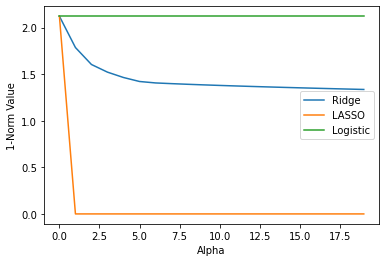

In [74]:
plt.figure()
plt.plot(range(20),ri_norm1,label='Ridge')
plt.plot(range(20),la_norm1,label='LASSO')
plt.plot(range(20),lg_norm1,label='Logistic')
plt.legend()  # 让图例生效
plt.xlabel('Alpha') #X轴标签
plt.ylabel("1-Norm Value") #Y轴标签
plt.show()

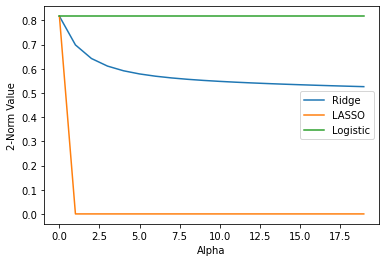

In [75]:
plt.figure()
plt.plot(range(20),ri_norm2,label='Ridge')
plt.plot(range(20),la_norm2,label='LASSO')
plt.plot(range(20),lg_norm2,label='Logistic')
plt.legend()  # 让图例生效
plt.xlabel('Alpha') #X轴标签
plt.ylabel("2-Norm Value") #Y轴标签
plt.show()

可以看到随着alpha增大，Ridge和LASSO的回归系数的1、2范数都会随之减小，对于LASSO来说格外明显。除此之外，我们观察到当alpha增加至1左右时，LASSO回归的回归系数的一范数与二范数全部变成了常数零，这提示我们alpha还会造成的显著影响是回归系数中0的个数，接下来再对这一因素进行探讨。

<ipython-input-79-a24deb5fa606>:5: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  lasso_w=Lasso(alpha=i).fit(feature_train,label_train).coef_
C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 73.23574629015782, tolerance: 0.03026057339588449
  model = cd_fast.enet_coordinate_descent(


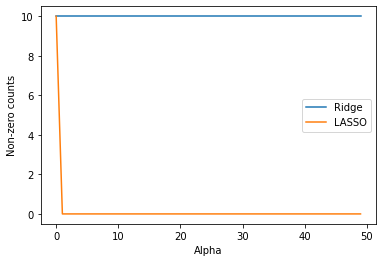

In [79]:
riz,laz=[],[]
for i in range(50):
    ri,la=0,0
    ridge_w=Ridge(alpha=i).fit(feature_train,label_train).coef_
    lasso_w=Lasso(alpha=i).fit(feature_train,label_train).coef_
    for j in range(len(ridge_w)):
        if ridge_w[j]!=0:
            ri+=1
        else:
            pass
    for k in range(len(lasso_w)):
        if lasso_w[j]!=0:
            la+=1
        else:
            pass
    riz.append(ri)
    laz.append(la)
plt.figure()
plt.plot(range(50),riz,label='Ridge')
plt.plot(range(50),laz,label='LASSO')
plt.legend()  # 让图例生效
plt.xlabel('Alpha') #X轴标签
plt.ylabel("Non-zero counts") #Y轴标签
plt.show()

很明显，当alpha=1时LASSO回归中系数就已经全部变成了零，由于alpha影响LASSO和Ridge的程度不同，接下来我们减小alpha的值，单独对LAASO进行做图分析。

<ipython-input-87-08841744cde9>:4: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  lasso_w=Lasso(alpha=i).fit(feature_train,label_train).coef_
C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 73.23574629015782, tolerance: 0.03026057339588449
  model = cd_fast.enet_coordinate_descent(


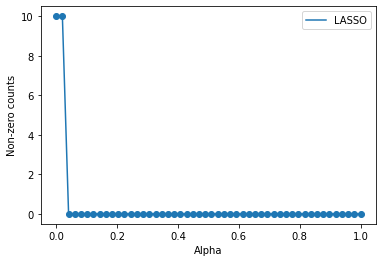

In [87]:
lazn=[]
for i in np.linspace(0,1,50):
    la=0
    lasso_w=Lasso(alpha=i).fit(feature_train,label_train).coef_
    for k in range(len(lasso_w)):
        if lasso_w[j]!=0:
            la+=1
        else:
            pass
    lazn.append(la)
plt.figure()
plt.plot(np.linspace(0,1,50),lazn,label='LASSO')
plt.scatter(np.linspace(0,1,50),lazn)
plt.legend()  # 让图例生效
plt.xlabel('Alpha') #X轴标签
plt.ylabel("Non-zero counts") #Y轴标签
plt.show()

可以看到LASSO回归系数中0的个数发生了突变，而突变的点与我们之前求得的最优alpha值十分接近。